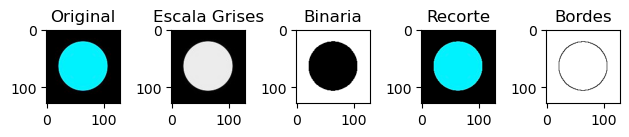

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from general import rgb2gray
from segmentacion.otsu import thresholdOtsu
from formas_binarias import detectar_bordes_binarios
from formas_binarias import FreemanChain
from formas_binarias import ErosionBin
from bordes import replaceColor
from formas_binarias import bettle
from formas_binarias import minimum_mag
from formas_binarias import first_difference

image2 = cv2.imread('imagenesPruebas/circle1.png')
imgGray = rgb2gray(image2)
binary = thresholdOtsu(imgGray)
masked = np.zeros_like(image2)
bordes_detectados = detectar_bordes_binarios(binary, 3)
for i in range(image2.shape[1]):
    for j in range(image2.shape[0]):
        if 1-binary[j, i] == 0:
            masked[j, i, :] = image2[j, i, :]
fig, axs = plt.subplots(1, 5)
axs[0].imshow(image2)
axs[0].set_title("Original")
axs[1].imshow(imgGray, cmap='gray')
axs[1].set_title("Escala Grises")
axs[2].imshow(binary, cmap='binary')
axs[2].set_title("Binaria")
axs[3].imshow(masked)
axs[3].set_title("Recorte")
axs[4].imshow(bordes_detectados, 'binary')
axs[4].set_title("Bordes")
fig.tight_layout()


In [11]:
chainCircle, borderCircle = FreemanChain(binary, 8)
print(chainCircle)
print(borderCircle)

(21, 61)
forzamos termino 
[0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 7, 0, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 7, 7, 0, 7, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[(21, 61), (21, 62), (21, 63), (21, 64), (21, 65), (21, 66), (21, 67), (22, 68), (22, 69), (22, 70), (22, 71), (22, 72), (22, 73), (23, 74), (23, 75), (23, 76), (24, 77), (24, 78), (24, 79), (25, 80), (25, 81), (26, 82), (26, 83), (27, 84), (27, 85), (

In [12]:
minmin = minimum_mag(chainCircle)
print(minmin)
final = first_difference (minmin,8)
print(final)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 7, 0, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 7, 7, 0, 7, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 7, 1, 0, 7, 1, 0, 7, 1, 7, 1, 7, 1, 7, 1, 7, 0, 0, 1, 7, 0, 0, 0, 7, 1, 0, 0, 7, 1, 0, 7, 1, 7, 1, 7, 1, 7, 0, 1, 7, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 7, 1, 0, 7, 1, 7, 1, 7, 1, 7, 0, 1,

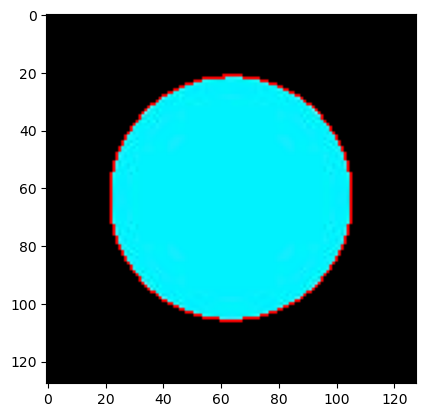

In [13]:
replaceColor(masked, borderCircle, (255,0,0))

(21, 61)
forzamos termino 
[(21, 61), (21, 62), (21, 63), (21, 64), (21, 65), (21, 66), (21, 67), (22, 67), (22, 68), (22, 69), (22, 70), (22, 71), (22, 72), (22, 73), (23, 73), (23, 74), (23, 75), (23, 76), (24, 76), (24, 77), (24, 78), (24, 79), (25, 79), (25, 80), (25, 81), (26, 81), (26, 82), (26, 83), (27, 83), (27, 84), (27, 85), (28, 85), (28, 86), (28, 87), (29, 87), (29, 88), (30, 88), (30, 89), (31, 89), (31, 90), (31, 91), (32, 91), (32, 92), (33, 92), (33, 93), (34, 93), (34, 94), (35, 94), (35, 95), (36, 95), (37, 95), (37, 96), (38, 96), (38, 97), (39, 97), (39, 98), (40, 98), (41, 98), (41, 99), (42, 99), (42, 100), (43, 100), (44, 100), (44, 101), (45, 101), (46, 101), (46, 102), (47, 102), (48, 102), (48, 103), (49, 103), (50, 103), (51, 103), (51, 104), (52, 104), (53, 104), (54, 104), (55, 104), (55, 105), (56, 105), (57, 105), (58, 105), (59, 105), (60, 105), (61, 105), (62, 105), (63, 105), (64, 105), (65, 105), (66, 105), (67, 105), (68, 105), (69, 105), (70, 105)

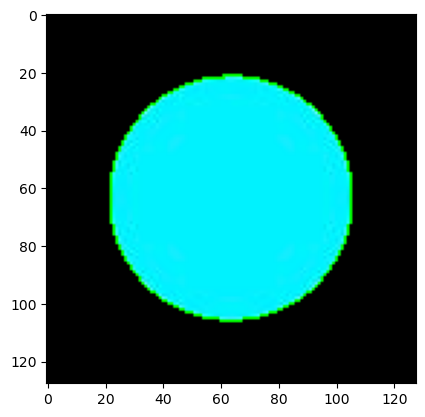

In [14]:
bordes = bettle(binary)
print(bordes)
replaceColor(masked, borderCircle, (0,255,0))

(22, 61)
forzamos termino 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 7, 0, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 7, 7, 0, 7, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 7, 1, 0, 7, 1, 0, 7, 1, 7, 1, 7, 1, 7, 1, 7, 0, 0, 1, 7, 0, 0, 0, 7, 1, 0, 0, 7, 1, 0, 7, 1, 7, 1, 7, 1, 7, 0, 1, 7, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 7, 1, 0,

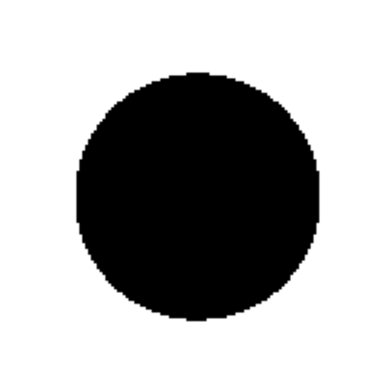

In [15]:
from general import rotar

ruta_imagen = 'imagenesPruebas/circle1.png'
angulo_rotacion = 180
img = rotar(ruta_imagen, angulo_rotacion)
imgGray = rgb2gray(img)
binary = thresholdOtsu(imgGray)
plt.imshow(binary, cmap='binary')
plt.axis('off')
chainRotado, borderCircle = FreemanChain(binary, 8)
rotadoMinmin = minimum_mag(chainRotado)
print(minmin)
Rotadofinal = first_difference (rotadoMinmin,8)
print(final)

if final == Rotadofinal:
    print("Es igual")
else:
    print("No es igual")

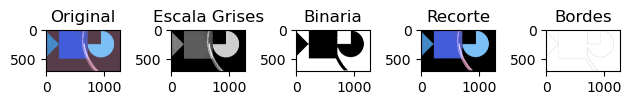

In [52]:
image1 = cv2.imread('imagenesPruebas/formas.png')
imgGray1 = rgb2gray(image1)
binary1 = thresholdOtsu(imgGray1)
kernel = np.ones((10, 10), np.uint8)
binary1 = cv2.dilate(binary1, kernel, iterations=1)
binary1 = ErosionBin(binary1, 12)
masked1 = np.zeros_like(image1)
bordes_detectados1 = detectar_bordes_binarios(binary1, 3)
for i in range(image1.shape[1]):
    for j in range(image1.shape[0]):
        if 1-binary1[j, i] == 0:
            masked1[j, i, :] = image1[j, i, :]
fig, axs = plt.subplots(1, 5)
axs[0].imshow(image1)
axs[0].set_title("Original")
axs[1].imshow(imgGray1, cmap='gray')
axs[1].set_title("Escala Grises")
axs[2].imshow(binary1, cmap='binary')
axs[2].set_title("Binaria")
axs[3].imshow(masked1)
axs[3].set_title("Recorte")
axs[4].imshow(bordes_detectados1, 'binary')
axs[4].set_title("Bordes")
fig.tight_layout()

In [53]:
chainWaves, borderWaves = FreemanChain(binary1, 4)
print(chainWaves)
print(borderWaves)

(1, 649)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

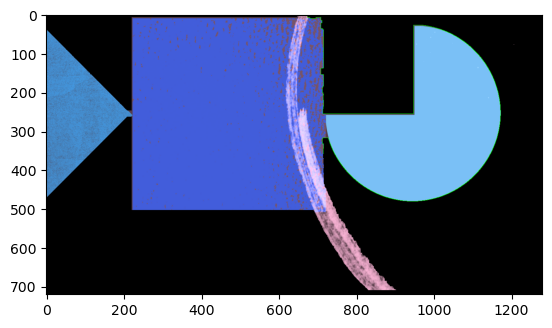

In [54]:
replaceColor(masked1, borderWaves, (0,255,0))

In [55]:
bordeF = bettle(binary1)
print(bordeF)

(1, 649)
[(1, 649), (1, 650), (1, 651), (1, 652), (1, 653), (1, 654), (1, 655), (1, 656), (1, 657), (1, 658), (1, 659), (1, 660), (1, 661), (1, 662), (1, 663), (1, 664), (1, 665), (1, 666), (1, 667), (1, 668), (1, 669), (1, 670), (1, 671), (1, 672), (1, 673), (1, 674), (2, 674), (3, 674), (4, 674), (5, 674), (6, 674), (7, 674), (8, 674), (8, 675), (8, 676), (8, 677), (8, 678), (8, 679), (8, 680), (9, 680), (9, 681), (10, 681), (11, 681), (11, 682), (11, 683), (11, 684), (11, 685), (11, 686), (11, 687), (11, 688), (11, 689), (11, 690), (11, 691), (11, 692), (11, 693), (11, 694), (11, 695), (11, 696), (10, 696), (9, 696), (8, 696), (8, 697), (8, 698), (8, 699), (8, 700), (8, 701), (8, 702), (8, 703), (8, 704), (8, 705), (8, 706), (8, 707), (8, 708), (8, 709), (9, 709), (10, 709), (11, 709), (12, 709), (13, 709), (14, 709), (15, 709), (15, 710), (16, 710), (16, 711), (16, 712), (17, 712), (18, 712), (19, 712), (20, 712), (21, 712), (22, 712), (22, 711), (22, 710), (23, 710), (23, 709), (2

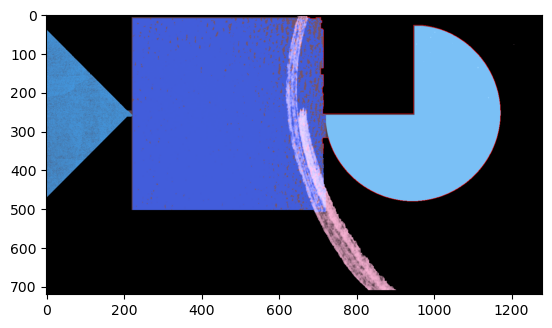

In [56]:
replaceColor(masked1, bordeF, (255,0,0))

In [57]:
minmin = minimum_mag(chainWaves)
print(minmin)
final = first_difference (minmin, 4)
print(final)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

(1, 369)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

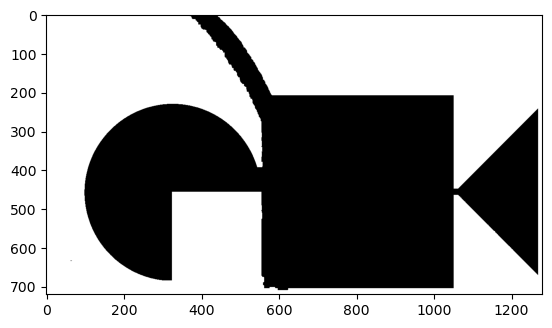

In [62]:
ruta_imagen = 'imagenesPruebas/formas.png'
angulo_rotacion = 180
img = rotar(ruta_imagen, angulo_rotacion)
imgGray1 = rgb2gray(img)
binary1 = thresholdOtsu(imgGray1)
kernel = np.ones((10, 10), np.uint8)
binary1 = cv2.dilate(binary1, kernel, iterations=1)
binary1 = ErosionBin(binary1, 12)
masked1 = np.zeros_like(image1)
for i in range(image1.shape[1]):
    for j in range(image1.shape[0]):
        if 1-binary1[j, i] == 0:
            masked1[j, i, :] = image1[j, i, :]
bordes_detectados1 = detectar_bordes_binarios(binary1, 3)
plt.imshow(binary1, cmap='binary')
chainRotado, borderCircle = FreemanChain(binary1, 4)
rotadoMinmin = minimum_mag(chainRotado)
print(rotadoMinmin)
Rotadofinal = first_difference (rotadoMinmin,4)
print(Rotadofinal)
if minmin == rotadoMinmin:
    print("Es igual")
else:
    print("No es igual")

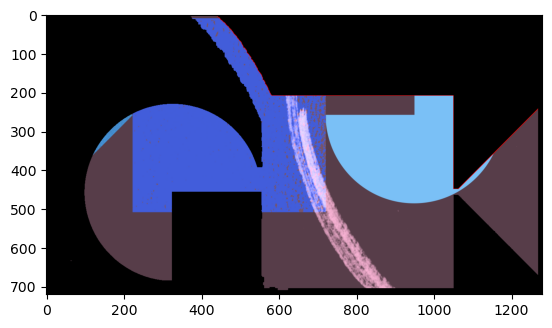

In [63]:
replaceColor(masked1, borderCircle, (255,0,0))